In [ ]:
# this code needs:
# - a file 'labels.csv'
# - the corresponding .wav-files

In [1]:
# import packages

import pandas as pd
import librosa
import librosa.display
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

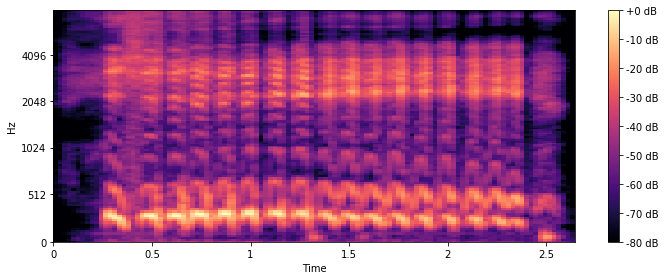

In [4]:
# plot laughter

y, sr = librosa.load('0097160c.wav')
librosa.feature.melspectrogram(y=y, sr=sr)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                         fmax=8000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,
                         ref=np.max),
                         y_axis='mel', fmax=8000,
                         x_axis='time')

plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

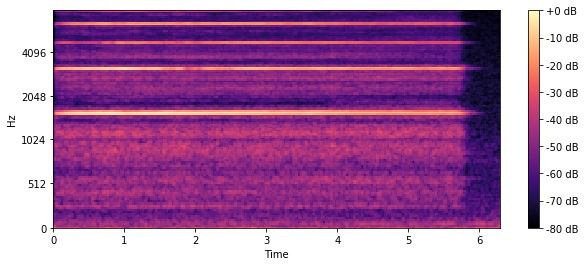

In [5]:
# plot violin

y, sr = librosa.load('fec00143.wav')
librosa.feature.melspectrogram(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                         fmax=8000)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,
                         ref=np.max),
                         y_axis='mel', fmax=8000,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.savefig('mel.png')

In [8]:
# create list of labels

labels = pd.read_csv('labels.csv')
labellist = labels[['filename','label']].values

In [9]:
# create array with features

# create list of all .wav-files
wav_list = glob.glob('./*.wav')

# create empty lists
train_data_v1_list = []
length_list = []
train_labels_v1 = []

# loop over all .wav-files
for i in wav_list:
    y, sr = librosa.load(i)

    # length of audio file
    fragment_length = librosa.core.get_duration(y)
    length_list.append(fragment_length)
    print(i)
   
    # extract label
    labelname = labels[labels['filename'] == i[2:]]['label'].to_string(index=False)

    # create spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    length = S.shape[1]

    # preparing data
    if length >= 45:
        S = S[:,int(length/2)-23:int(length/2)+22]

    if length < 45:
        S = np.pad(S,((0,0),(0,45-length)),'constant')

    S = S.flatten().tolist()

    # append data
    if len(S) > 0:
        train_data_v1_list.append(S)
        train_labels_v1.append(labelname)

train_data_v1 = np.array(train_data_v1_list)

./d5fc9f70.wav
./37c85fee.wav
./be014d8c.wav
./a24a925e.wav
./7f553a15.wav
./1148986e.wav
./afd24fef.wav
./58fec070.wav
./98155566.wav
./e7bbd7e7.wav
./642aba58.wav
./eeb6f911.wav
./ee8776ee.wav
./6994bf26.wav
./4428ce4f.wav
./a2d9bbfb.wav
./4c1d875e.wav
./1551f28a.wav
./87e8ae71.wav
./7b9a02a0.wav
./67e80e0a.wav
./813817a5.wav
./c5633969.wav
./e7320b5e.wav
./b6d82634.wav
./6dd8c59b.wav
./1ab80336.wav
./6ee9f703.wav
./196c8a34.wav
./7aba7444.wav
./a392fe69.wav
./b7934365.wav
./23b8788a.wav
./d931fa78.wav
./46d7d98d.wav
./754be109.wav
./cb011638.wav
./b73c3595.wav
./f22b1915.wav
./85558d98.wav
./6191b717.wav
./be7e8a65.wav
./f3d16179.wav
./4f716ff6.wav
./889a0bc2.wav
./0f6e2a63.wav
./d1d295bd.wav
./3f6dbc86.wav
./0733ce78.wav
./fe288eee.wav
./a3f07a73.wav
./60f481f8.wav
./e6a72f99.wav
./85bd7e1b.wav
./188cfb1b.wav
./16d51b04.wav
./822fdbff.wav
./22e83dcb.wav
./17d87e42.wav
./a5bbd485.wav
./a7a03d8b.wav
./616e8c33.wav
./bf3bd60f.wav
./c7823f25.wav
./18674495.wav
./1516d630.wav
./255db1a8

./de06cab6.wav
./c0f558f9.wav
./649c7632.wav
./2c98dea1.wav
./626f8d25.wav
./c6802358.wav
./bf7b5df3.wav
./ac52ee24.wav
./41933d4e.wav
./ec7c9d41.wav
./2e4a9850.wav
./d9540472.wav
./93a6ff48.wav
./76892e9c.wav
./d7f81ca5.wav
./767c9e2d.wav
./14577fc0.wav
./8dd69b5e.wav
./cd9444a0.wav
./aaf6167e.wav
./08b88eb7.wav
./7f60f335.wav
./ef73c29c.wav
./0ca8b59b.wav
./3592e056.wav
./deeacc1c.wav
./ee6731df.wav
./c33a994b.wav
./86fac849.wav
./04e8596a.wav
./a4da36e1.wav
./7eb9dac0.wav
./0f7f0d86.wav
./8b5798fc.wav
./c6082047.wav
./ed274378.wav
./75eeefbf.wav
./f4d458ec.wav
./801a341a.wav
./6a0f3e43.wav
./40a93104.wav
./543e2e44.wav
./848faca3.wav
./6a1b4c44.wav
./92c1d241.wav
./73e548a5.wav
./18492a23.wav
./889edf2f.wav
./024a193f.wav
./7b6a119e.wav
./9f436c6d.wav
./be4b329a.wav


In [11]:
# test dimensions
print(train_data_v1.shape)
print(len(train_labels_v1))

(596, 5760)
596


In [ ]:
# save data to pickle
pickle.dump([train_data_v1,train_labels_v1],open("train_data_v1.pk", "wb" ) )